# I. Perkenalan

Nama : Arya Bandoro

FTDS Batch - 004 

# II. Import Pustaka

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as plot
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Dense


# III. Data Loading

In [2]:
data_awal = pd.read_csv(r'C:\Users\Acer\OneDrive\Documents\Hacktiv8\Phase 2\Milestone 1\Data.csv')

In [3]:
data_awal

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


Kita dapat cek info mengenai datanya dengan cara berikut ini

In [4]:
data_awal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Kita dapat melihat statistical descriptive nya

In [5]:
data_awal.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


# III. Data Cleaning

Kita dapat menghapus beberapa kolom yang tidak dibutuhkan, sebagai contoh kita tidak membutuhkan costumer id, kita dapat menghapus kolom dengan koding sebagai berikut ini

In [6]:
data_hapus = data_awal.drop(columns=['customerID'])

Kita cek apakah ada missing value 

In [7]:
data_hapus.isnull().sum()



gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Tidak ada missing value

kita dapat cek distribusi data, mengetahui apakah data yang diolah ini memiliki anomali

<AxesSubplot:>

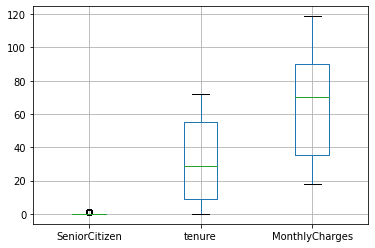

In [8]:
data_hapus.boxplot()

# IV. Data Exploration

Pertama kita coba cek data berdasarkan gendernya

In [9]:
a = data_hapus['gender'].value_counts().index
b = data_hapus['gender'].value_counts().values

fig = px.pie(data_hapus,names=a,values=b)
fig.show()

Diketahui bahwa dari total datanya lebih banyak pelanggan laki laki, dengan presentase sebesar 50.5%

Kita bisa cek dari sisi 

In [10]:
c = data_hapus['InternetService'].value_counts().index
d = data_hapus['InternetService'].value_counts().values
fig2 = px.bar(data_hapus,x = c, y=d)
fig2.show()

In [11]:
c

Index(['Fiber optic', 'DSL', 'No'], dtype='object')

Diketahui bahwa paling banyak menggunakan Fiber Optic

In [12]:
data_fiber = data_awal[data_awal['InternetService'] == 'Fiber optic']
data_dsl = data_awal[data_awal['InternetService'] == 'DSL']
data_tidak = data_awal[data_awal['InternetService'] == 'No']

In [13]:
e = data_fiber['Churn'].value_counts().index
f = data_fiber['Churn'].value_counts().values

fig3 = px.pie(data_fiber,names=e,values=f)
fig3.show()

In [14]:
g = data_dsl['Churn'].value_counts().index
h = data_dsl['Churn'].value_counts().values

fig3 = px.pie(data_dsl,names=g,values=h)
fig3.show()

In [15]:
i = data_tidak['Churn'].value_counts().index
j = data_tidak['Churn'].value_counts().values

fig3 = px.pie(data_tidak,names=i,values=j)
fig3.show()

Ternyata yang paling banyak meninggalkan adalah yang menggunakan internet provider Fiber Optic

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

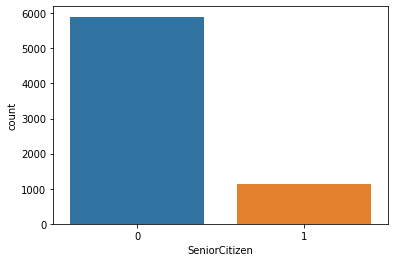

In [16]:
sns.countplot(x = "SeniorCitizen", data = data_hapus)
data_hapus.loc[:, 'SeniorCitizen'].value_counts()

Terdapat 5901 Senior Citizen pada Data

In [17]:
k = data_hapus['PaymentMethod'].value_counts().index
l = data_hapus['PaymentMethod'].value_counts().values

fig4 = px.pie(data_hapus,names=k,values=l)
fig4.show()


Paling banyak adalah menggunakan elektronik payment

# V. Data Preprocessing



Melakukan Future Engginering

Selanjutnya dapat kita lakukan encoding dengan cara sebagai berikut ini

In [18]:
data_bersih = data_hapus.apply(lambda x: LabelEncoder().fit_transform(x) if x.dtype == 'object' else x)
data_bersih.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1


Selanjutnya dapat kita cari data data yang memiliki korelasi dengan cara sebagai berikut ini

<AxesSubplot:>

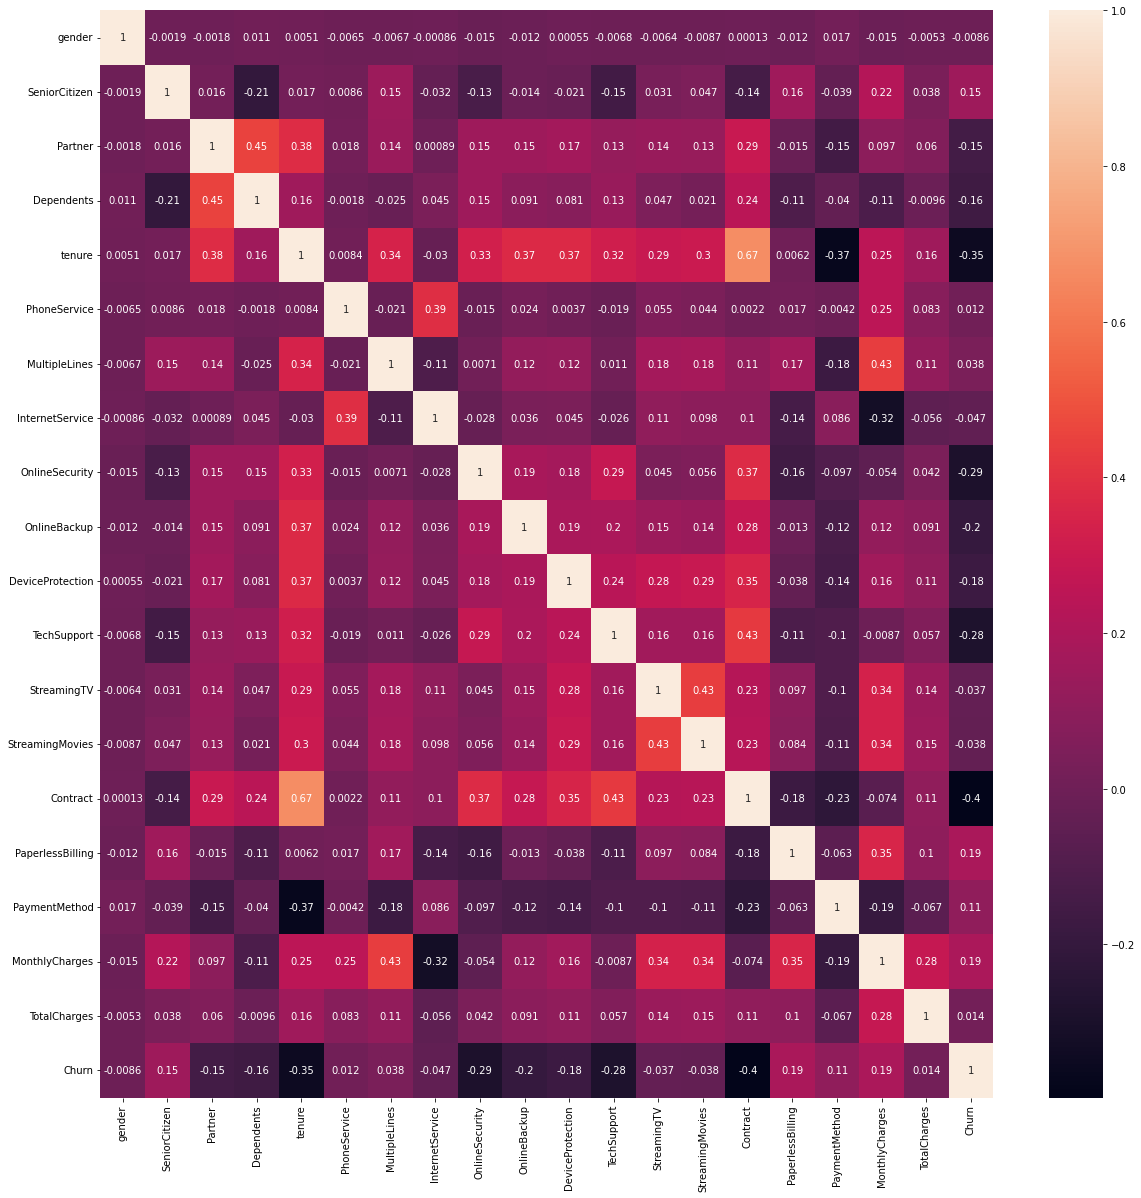

In [19]:
plt.figure(figsize =(20,20))
Corr=data_bersih[data_bersih.columns].corr()
sns.heatmap(Corr,annot=True)

Kita bisa melihat bahwa data yang paling berkorelasi adalah (Saya Mengambil Parameter Berkorelasi jika lebih dari mutlak 0.2) :
1. Senior Citizen

2. Partner

3. Dependents 

4. Tenure

5. Online Security

6. Online Backup

7. Tech Support

8. Contract

Kita lakukan filtering data

In [20]:
data_fix = data_bersih.drop(columns=['gender','PhoneService', 'MultipleLines', 'InternetService','DeviceProtection','StreamingTV','StreamingMovies','PaperlessBilling', 'PaymentMethod','MonthlyCharges', 'TotalCharges'])

In [21]:
data_fix

,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,OnlineBackup,TechSupport,Contract,Churn
0,0,1,0,1,0,2,0,0,0
1,0,0,0,34,2,0,0,1,0
2,0,0,0,2,2,2,0,0,1
3,0,0,0,45,2,0,2,1,0
4,0,0,0,2,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,2,0,2,1,0
7039,0,1,1,72,0,2,0,1,0
7040,0,1,1,11,2,0,0,0,0
7041,1,1,0,4,0,0,0,0,1


Kita cek deskripsi dari datanya 

In [22]:
data_fix.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0
Partner,7043.0,0.483033,0.499748,0.0,0.0,0.0,1.0,1.0
Dependents,7043.0,0.299588,0.458110,0.0,0.0,0.0,1.0,1.0
tenure,7043.0,32.371149,24.559481,0.0,9.0,29.0,55.0,72.0
OnlineSecurity,7043.0,0.790004,0.859848,0.0,0.0,1.0,2.0,2.0
OnlineBackup,7043.0,0.906432,0.880162,0.0,0.0,1.0,2.0,2.0
TechSupport,7043.0,0.797104,0.861551,0.0,0.0,1.0,2.0,2.0
Contract,7043.0,0.690473,0.833755,0.0,0.0,0.0,1.0,2.0
Churn,7043.0,0.265370,0.441561,0.0,0.0,0.0,1.0,1.0


Kita cek nilai yang hilang

In [23]:
data_fix.isnull().sum()

SeniorCitizen     0
Partner           0
Dependents        0
tenure            0
OnlineSecurity    0
OnlineBackup      0
TechSupport       0
Contract          0
Churn             0
dtype: int64

Kita cek jenis datanya

In [24]:
data_fix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   SeniorCitizen   7043 non-null   int64
 1   Partner         7043 non-null   int32
 2   Dependents      7043 non-null   int32
 3   tenure          7043 non-null   int64
 4   OnlineSecurity  7043 non-null   int32
 5   OnlineBackup    7043 non-null   int32
 6   TechSupport     7043 non-null   int32
 7   Contract        7043 non-null   int32
 8   Churn           7043 non-null   int32
dtypes: int32(7), int64(2)
memory usage: 302.8 KB


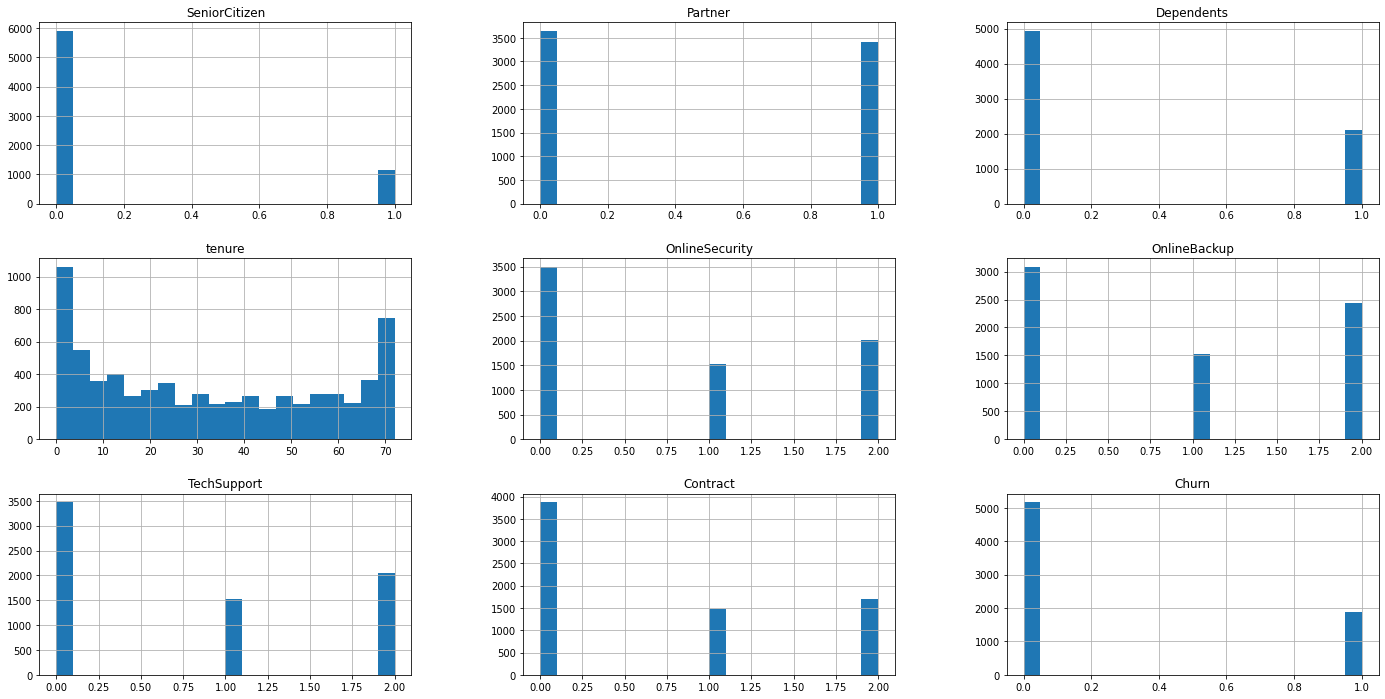

In [25]:
data_fix.hist(figsize=(24,12),bins=20)
plt.show()

# VI. Model Definition

In [26]:
x=data_fix.drop(columns=['Churn'])
y=data_fix['Churn']

In [27]:
normalizer=tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(x)

In [28]:
dataset = tf.data.Dataset.from_tensors(data_fix)

Melakukan split data

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.2)

In [30]:
datasets_train_baru=tf.data.Dataset.from_tensor_slices((x_train,y_train))
datasets_val_baru=tf.data.Dataset.from_tensor_slices((x_val,y_val))
datasets_train_pakai=datasets_train_baru.shuffle(50).batch(64)
datasets_val_pakai=datasets_val_baru.shuffle(50).batch(32)

Model Sequential API

In [31]:
model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(200,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [32]:
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

# VII. Model Training

In [33]:
model.fit(datasets_train_pakai,epochs=50,validation_data=(datasets_val_pakai))

Epoch 1/50
62/62 [==============================] - 1s 6ms/step - loss: 0.4806 - accuracy: 0.7647 - val_loss: 0.4661 - val_accuracy: 0.7667
Epoch 2/50
62/62 [==============================] - 0s 4ms/step - loss: 0.4458 - accuracy: 0.7903 - val_loss: 0.4662 - val_accuracy: 0.7647
Epoch 3/50
62/62 [==============================] - 0s 4ms/step - loss: 0.4394 - accuracy: 0.7921 - val_loss: 0.4644 - val_accuracy: 0.7647
Epoch 4/50
62/62 [==============================] - 0s 4ms/step - loss: 0.4365 - accuracy: 0.7913 - val_loss: 0.4653 - val_accuracy: 0.7566
Epoch 5/50
62/62 [==============================] - 0s 4ms/step - loss: 0.4330 - accuracy: 0.7928 - val_loss: 0.4647 - val_accuracy: 0.7606
Epoch 6/50
62/62 [==============================] - 0s 4ms/step - loss: 0.4311 - accuracy: 0.7928 - val_loss: 0.4648 - val_accuracy: 0.7688
Epoch 7/50
62/62 [==============================] - 0s 4ms/step - loss: 0.4295 - accuracy: 0.7923 - val_loss: 0.4652 - val_accuracy: 0.7617
Epoch 8/50
62/62 [==

Model Improvement


In [34]:
model3 = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(100,activation='relu',kernel_initializer=tf.keras.initializers.HeNormal()),
    keras.layers.BatchNormalization(),

    tf.keras.layers.Dense(200,activation='relu',kernel_initializer=tf.keras.initializers.HeNormal()),
    keras.layers.BatchNormalization(),
     tf.keras.layers.Dropout(.1),
    tf.keras.layers.Dense(100,activation='relu',kernel_initializer=tf.keras.initializers.HeNormal()),
    keras.layers.BatchNormalization(),
    
    tf.keras.layers.Dense(100,activation='relu',kernel_initializer=tf.keras.initializers.HeNormal()),
    keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(50,activation='relu'),
    keras.layers.BatchNormalization(),
    
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [35]:
model3.compile(
    optimizer='adam',
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=['Recall']
)

In [36]:
model3.fit(datasets_train_pakai,epochs=50,validation_data=(datasets_val_pakai))

Epoch 1/50


C:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\util\dispatch.py:1096: UserWarning:

"`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"



62/62 [==============================] - 2s 13ms/step - loss: 0.5971 - recall: 0.6701 - val_loss: 0.6485 - val_recall: 0.7835
Epoch 2/50
62/62 [==============================] - 0s 8ms/step - loss: 0.4872 - recall: 0.6041 - val_loss: 0.5102 - val_recall: 0.5945
Epoch 3/50
62/62 [==============================] - 0s 8ms/step - loss: 0.4525 - recall: 0.5570 - val_loss: 0.4940 - val_recall: 0.6024
Epoch 4/50
62/62 [==============================] - 1s 8ms/step - loss: 0.4431 - recall: 0.5391 - val_loss: 0.4777 - val_recall: 0.5433
Epoch 5/50
62/62 [==============================] - 0s 7ms/step - loss: 0.4344 - recall: 0.5306 - val_loss: 0.4848 - val_recall: 0.5079
Epoch 6/50
62/62 [==============================] - 0s 7ms/step - loss: 0.4300 - recall: 0.5174 - val_loss: 0.4883 - val_recall: 0.5315
Epoch 7/50
62/62 [==============================] - 0s 7ms/step - loss: 0.4252 - recall: 0.5137 - val_loss: 0.4847 - val_recall: 0.5118
Epoch 8/50
62/62 [==============================] - 0s 7ms

Functional API

In [37]:
masukan = keras.layers.Input(shape=(8,))
dense1 = tf.keras.layers.Dense(100, activation='relu')(masukan)
dense2 = tf.keras.layers.Dense(70, activation='relu')(dense1)
dense3 = tf.keras.layers.Dense(30, activation='relu')(dense2)
keluaran = tf.keras.layers.Dense(1, activation='sigmoid')(dense3)

In [38]:
model2 = Model(inputs=masukan, outputs=keluaran)

In [39]:
model2.compile(optimizer='adam',
              loss='mse')

In [40]:
model2.fit(datasets_train_pakai,epochs=50, batch_size=128,validation_data=(datasets_val_pakai))

Epoch 1/50
62/62 [==============================] - 1s 4ms/step - loss: 0.1657 - val_loss: 0.1702
Epoch 2/50
62/62 [==============================] - 0s 2ms/step - loss: 0.1524 - val_loss: 0.1599
Epoch 3/50
62/62 [==============================] - 0s 2ms/step - loss: 0.1470 - val_loss: 0.1573
Epoch 4/50
62/62 [==============================] - 0s 2ms/step - loss: 0.1461 - val_loss: 0.1655
Epoch 5/50
62/62 [==============================] - 0s 2ms/step - loss: 0.1468 - val_loss: 0.1515
Epoch 6/50
62/62 [==============================] - 0s 2ms/step - loss: 0.1443 - val_loss: 0.1515
Epoch 7/50
62/62 [==============================] - 0s 2ms/step - loss: 0.1451 - val_loss: 0.1524
Epoch 8/50
62/62 [==============================] - 0s 2ms/step - loss: 0.1435 - val_loss: 0.1537
Epoch 9/50
62/62 [==============================] - 0s 3ms/step - loss: 0.1431 - val_loss: 0.1620
Epoch 10/50
62/62 [==============================] - 0s 2ms/step - loss: 0.1484 - val_loss: 0.1549
Epoch 11/50
62/62 [

# VIII. Model Evaluation

In [41]:
model.evaluate(x_test,y_test)

67/67 [==============================] - 0s 2ms/step - loss: 0.4918 - accuracy: 0.7714


[0.49176421761512756, 0.7714150547981262]

Menghasilkan Akurasi Sebesar 76%

In [42]:
model2.evaluate(x_test,y_test)

67/67 [==============================] - 0s 1ms/step - loss: 0.1486


0.14863437414169312

# VIII. Model Inference

In [43]:
masukan = x.sample()

In [44]:
masukan

,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,OnlineBackup,TechSupport,Contract
3179,0,0,0,27,1,1,1,2


In [45]:
prediksi_sq = model.predict(masukan)
prediksi_func = model2.predict(masukan)

In [46]:
prediksi_sq

array([[2.4699786e-05]], dtype=float32)

In [47]:
prediksi_func

array([[0.00578758]], dtype=float32)

# IX. Pengambilan Kesimpulan 

### Didapatkan bahwa kesimpulannya adalah :
1. Kedua Model Didapatkan hasil yang hampir sama dimana adalah tidak Churn

2. Dari data yang didapatkan didapatkan bahwa ada beberapa variabel yang paling mempengaruhi, dimana diantaranya adalah partner, contract dll

3. didapatkan bahwa terdapat korelasi yang cukup tinggi di beberapa fitur data terhadap hasil dari behaviour pelanggan

### Sehingga Kesimpulan Untuk Executive :
1. Penguatan Layanan Pada Pelanggan dikuatkan pada beberapa fitur yang paling berpengaruh

2. Dibutuhkan suatu Layanan yang dapat menaikan minat yang berhubungan dengan fitur yang paling berpengaruh terhadap pelanggan